In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix, distOutputLayer
from lps_toolbox.metrics.classification import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle
import plotly


Using TensorFlow backend.


In [2]:
classes={'class_S':[[9,10,13,14,16,23,1,2,22,21],
                             [4,6,8,12,17,19],
                             [11,24],
                             [5,7,15,3,18,20]],
        'class_A':[[9,10,13,14,16],
                        [23,1,2,22],
                        [21]],
        'class_B':[[4],
                        [6],
                        [8],
                        [12],
                        [17],
                        [19]],
        'class_D':[[5,7,15],
                [3,18,20]],
         
        'class_C':[[11],
                    [24]],
        'class_AA':[[9],
                         [10],
                         [13],
                         [14],
                         [16]],
        'class_AB':[[23],
                         [1],
                         [2],
                         [22]],
        'class_DA':[[5],
                         [7],
                         [15]],
        'class_DB':[[3],
                         [18],
                         [20]]}

In [3]:
class_name = list(classes.keys())
n_folds = 10
n_pcds = 10
batch = 512

files = {}
files_fold = {}
eff_ech_class = {}
file_hier = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/dev/PCD_Hierarq_withFolds_3_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{0}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(batch)
#table_master = pd.read_csv(file_hier+'/master_table.csv')

In [ ]:
for ifold in range(n_folds):
    sp_folds = []
    for iclass in class_name:
        train_pcds_classb = {}
        for i in range(n_pcds):
            train_pcds_classb[i] = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/pcd_coop_obj_trn_desc_pcd_{0}.csv'.format(i))
        
        df = pd.concat(train_pcds_classb)
        
        print('{0},{1} = {2:.2f}'.format(iclass,ifold+1,max(df.groupby(level=0).agg(['max'])['sp'].values)[0]))
     
        
        nrows=2
        ncols=5
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,5), sharex=False)
        fig.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.4, hspace=0.4)
        i=0
        for irow in range(nrows):
            for icol in range(ncols):
                ax = axes[irow,icol]
                df.loc[i].plot(x='epoch',y=['sp','best_epoch','loss','val_loss'],legend=True,grid=True,secondary_y=['sp'],title='PCD {0}'.format(i+1),ax=ax)
                ax.set_axis_on()
                i = i + 1
        fig.suptitle('train of Hierarchically committee member {0} of fold {1:02d}'.format(iclass.split('_')[-1],ifold+1),x=1.05)
        savefig(plt=fig,filename=file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/PCD_train.png')
        

In [31]:
np.asarray(class_name)[[0,1]]

array(['class_B', 'class_S'], dtype='|S8')

In [ ]:
classes = [[4,6,8,12,17,19],
           ['A','B','C','D'],
           ['AA','AB','AC'],
           [9,10,13,14,16],
           ['DA','DB'],
           [11,24],
           [3,18,20],
           [5,7,15],
           [23,1,2,22]
          ]

for iclass,name_classes,enum in zip(np.asarray(class_name),np.asarray(classes),range(len(class_name))):#[[0,3]]):
    sp_folds = []
    name = iclass.split('_')[-1]
    for ifold in range(n_folds):
        pred = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/predict.csv')
        table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
        test_id = table_master[(table_master[iclass]!=-1)&(table_master['fold_0{0}'.format(ifold)]==1)].index.values
        true = table_master[(table_master[iclass]!=-1)][iclass].values
        values = pred[(table_master[iclass]!=-1)].values


        n_neurons = len(name_classes)
        
        if enum in [0,3]:
            figsize_value = (15,15)
        elif enum in [1,2,6,7,8]:
            figsize_value = (10,8)
        else:
            figsize_value = (7,5)
        
        fig, axes = distOutputLayer(predict=values, trgt=true,figsize=figsize_value,x_label= [u'valores da saída'.format(row+1) for row in range(n_neurons)],
                            cols_label=[u'Classe {}'.format(col) for col in name_classes],
                            rows_label=[u'Neurônio da Classe {}'.format(row) for row in name_classes],
                           suptitle=u"Quantidades de janelas na saída de cada neurônio do Classificador {0}".format(name),
                           suptitle_kwg={'fontsize':14,'y':1.01})


        low_label = [u'valores da saída'.format(row+1) for row in range(n_neurons)]
        break
        
        savefig(fig,file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/hist_outputNeuronXclass_allFolds.png')

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/dev/PCD_Hierarq_withFolds_3_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/SP_each_classes_en.png file


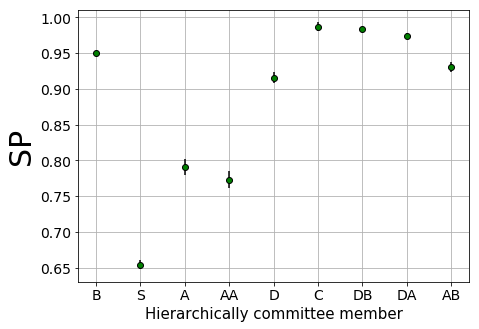

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
sp_class_mean = []
sp_class_std = []

for iclass in class_name:
    sp_folds = []
    for ifold in range(n_folds):
        pred = np.argmax(pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/{0}'.format(iclass)+'/predict.csv').values,axis=1)
        table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
        test_id = table_master[(table_master[iclass]!=-1)&(table_master['fold_0{0}'.format(ifold)]==1)].index.values
        true = table_master[iclass].values
        
        sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])

        sp_folds.append(sp)
        
    pd.Series(data=sp_folds).to_csv(file_hier+'/sp_{0}.csv'.format(iclass),index=False)
    
    sp_class_mean.append(np.asarray(sp_folds).mean())
    sp_class_std.append(np.asarray(sp_folds).std())

plt.errorbar(x=map(lambda x: x.split('_')[-1],class_name),y=sp_class_mean,yerr=sp_class_std,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=u"SP médio")
plt.grid()
#plt.xlabel("Classes",fontsize=30)
plt.xlabel("Hierarchically committee member",fontsize=15)

plt.ylabel("SP",fontsize=30)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.title(u"SP de cada classe em cada nível da Rede Hierárquica (10 folds)",fontsize=15)
#plt.savefig(file_hier+'SP_all_classes_pt.png')
savefig(plt,file_hier +'/SP_each_classes_en.png')

In [4]:
df_pred = {}
for ifold in range(n_folds):
    files_fold[ifold] = file_hier + '/fold0{0}'.format(ifold)
    files_class = []
    for iclass in class_name:
        file = file_hier + '/fold0{0}'.format(ifold) +'/'+iclass
        files_class.append(file)
    files[ifold] = files_class
    df_pred[ifold] = pd.read_csv(files_fold[ifold] + '/pred_all.csv')

In [5]:
pred_df = pd.concat(df_pred)

In [6]:
#work with only pred_df and table_master
sp_folds = []
for ifold in range(n_folds):
    pred = pred_df.loc[ifold]['pred'].values
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    true = table_master['target'].values
    sp = sp_index(y_pred=pred[test_id],y_true=true[test_id])
    sp_folds.append(sp)
    print("SP of fold {0}:{1:.2f}".format(ifold,sp))

print("SP: {0:.2f} +- {1:.2f}".format(np.asarray(sp_folds).mean(),np.asarray(sp_folds).std()))

SP of fold 0:0.51
SP of fold 1:0.49
SP of fold 2:0.50
SP of fold 3:0.51
SP of fold 4:0.50
SP of fold 5:0.51
SP of fold 6:0.51
SP of fold 7:0.51
SP of fold 8:0.52
SP of fold 9:0.52
SP: 0.51 +- 0.01


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/dev/PCD_Hierarq_withFolds_3_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/recall_each_classes_en.png file


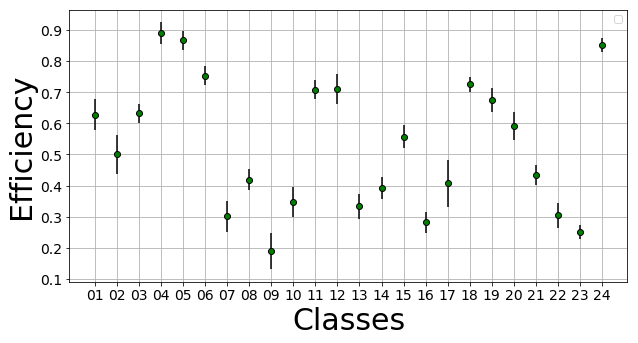

In [12]:
from sklearn.metrics import recall_score

recall_folds = []
for ifold in range(n_folds):
    pred = pred_df.loc[ifold]['pred'].values
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    true = table_master['target'].values
    recall = recall_score(y_pred=pred[test_id],y_true=true[test_id],average=None)
    
    
    recall_folds.append(recall)

recall_mean = np.asarray(recall_folds).mean(axis=0)
recall_std = np.asarray(recall_folds).std(axis=0)

fig, ax = plt.subplots(figsize=(10,5))

plt.errorbar(x=['{0:02d}'.format(i+1) for i in range(24)],y=recall_mean,
             yerr=recall_std,
             marker='o',
             color='k',
             ecolor='k',
             markerfacecolor='g',
             capsize=0,
             linestyle='None',label=None)
plt.grid()
plt.xlabel("Classes",fontsize=30)
plt.ylabel(u"Efficiency",fontsize=30)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.title(u"Resultado da ativação do classe hierarquica utilizando todo o conjunto de dados",fontsize=15)
plt.legend()
savefig(plt,file_hier +'/recall_each_classes_en.png')

In [10]:
print("Eff: {0:.2f} +- {1:.2f}".format(np.asarray(recall_mean).mean(),np.asarray(recall_mean).std()))

Eff: 0.53 +- 0.21


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/dev/PCD_Hierarq_withFolds_3_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/confusion_matrix_sns.png file


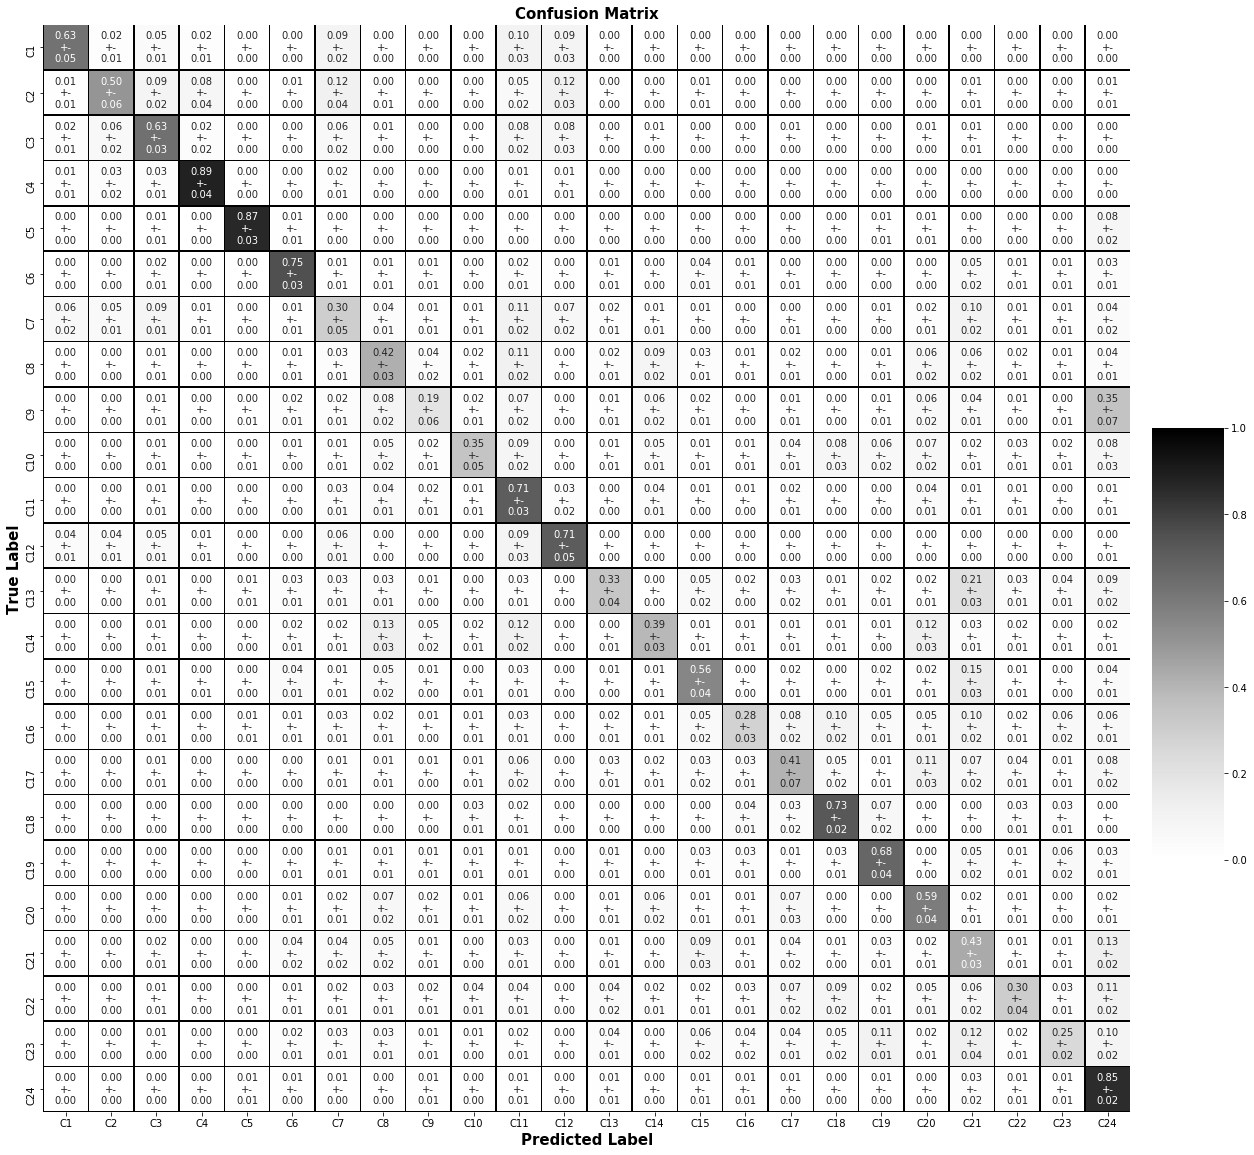

In [7]:
#fig, ax = plt.subplots(figsize=(30,30))

#plotConfusionMatrix(pred, true, class_labels=['Classe {0:02d}'.format(i+1) for i in range(24)], ax=ax)
#work with only pred_df and table_master
cm_folds = []
for ifold in range(n_folds):
    pred = pred_df.loc[ifold]['pred'].values
    table_master = pd.read_csv(file_hier+'/fold0{0}'.format(ifold)+'/master_table.csv')
    test_id = table_master[table_master['fold_0{0}'.format(ifold)]==1].index.values
    
    true = table_master['target'].values
    confusionMatrix = confusion_matrix(y_pred=pred[test_id],y_true=true[test_id])
    cm_norm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    
    cm_folds.append(cm_norm)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_aspect(1)

cbar_ax = fig.add_axes([.905, .3, .05, .3])

snsConfusionMatrix(cm_norm=cm_folds,ax=ax,
                   x_labels=['C{0}'.format(i+1) for i in range(24)],
                   y_labels=['C{0}'.format(i+1) for i in range(24)],
                   sns_kwg={'cbar_ax':cbar_ax,'cbar':True})

#plt.title('Confusion matrix of HierarqNet using MLP as estimator',fontsize=20,fontweight="bold")
fig_cm = file_hier + '/confusion_matrix_sns.png'
savefig(fig,fig_cm)